**SETUP AND DATA LOADING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"]=(10,6)



**UPLOAD DATASET**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/crop_production.csv', encoding='latin-1')
df.head()

,State,Crop,Year,Season,Area (ha),Production (tonnes),Yield (tonnes/ha),Fertilizer Used,Irrigation Type,Soil Type,Pesticide Used,Temperature (°C),Rainfall (mm),Labor Count,District,Market Price (Rs/quintal),Government Support
0,Tamil Nadu,Sugarcane,2021,Zaid,36867.70,121515.03,3.30,DAP,Sprinkler,Black,No,30.5,1364.9,18,Patna,4841.01,No
1,Tamil Nadu,Rice,2019,Zaid,3846.10,15763.35,4.10,MOP,Rainfed,Red,Yes,25.8,506.1,85,Chennai,2014.68,Yes
2,Bihar,Maize,2021,Rabi,36377.94,156994.75,4.32,DAP,Drip,Sandy,Yes,25.3,1348.9,41,Patna,4499.91,Yes
3,Haryana,Sugarcane,2021,Kharif,15907.87,48905.08,3.07,Compost,Rainfed,Sandy,No,38.6,906.9,48,Bangalore,4696.31,Yes
4,Bihar,Wheat,2017,Zaid,30980.79,59436.08,1.92,Urea,Canal,Black,No,23.4,390.6,13,Patna,3681.66,Yes


**BASIC INFO AND CLEANING**

In [ ]:
print("Shape of Dataset:",df.shape)
df.info()
print('\n')
df.describe()

Shape of Dataset: (1050, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      1050 non-null   object 
 1   Crop                       1050 non-null   object 
 2   Year                       1050 non-null   int64  
 3   Season                     1050 non-null   object 
 4   Area (ha)                  1050 non-null   float64
 5   Production (tonnes)        1050 non-null   float64
 6   Yield (tonnes/ha)          1050 non-null   float64
 7   Fertilizer Used            829 non-null    object 
 8   Irrigation Type            1050 non-null   object 
 9   Soil Type                  1050 non-null   object 
 10  Pesticide Used             1050 non-null   object 
 11  Temperature (°C)           1050 non-null   float64
 12  Rainfall (mm)              1050 non-null   float64
 13  Labor Count        

,Year,Area (ha),Production (tonnes),Yield (tonnes/ha),Temperature (°C),Rainfall (mm),Labor Count,Market Price (Rs/quintal)
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2019.010476,25497.654076,76783.912895,3.013181,30.147143,1031.752190,52.541905,3030.771895
std,1.440555,14168.377862,49171.224286,0.865104,5.860842,535.844362,26.646052,1182.326466
min,2017.000000,1163.970000,2202.510000,1.500000,20.000000,103.700000,5.000000,1000.630000
25%,2018.000000,13343.565000,36285.587500,2.262500,25.300000,575.275000,30.000000,2016.282500
50%,2019.000000,25756.250000,71381.750000,3.060000,30.100000,1043.500000,52.000000,2990.105000
75%,2020.000000,37394.052500,109318.450000,3.750000,35.275000,1478.675000,76.000000,4102.280000
max,2021.000000,49820.450000,217337.590000,4.490000,40.000000,1999.000000,99.000000,4997.340000


In [ ]:
# Check missing values
print("Missing values:")
print(df.isnull().sum())


Missing values:
State                          0
Crop                           0
Year                           0
Season                         0
Area (ha)                      0
Production (tonnes)            0
Yield (tonnes/ha)              0
Fertilizer Used              221
Irrigation Type                0
Soil Type                      0
Pesticide Used                 0
Temperature (°C)               0
Rainfall (mm)                  0
Labor Count                    0
District                       0
Market Price (Rs/quintal)      0
Government Support             0
dtype: int64


In [ ]:
#fill missing values if null are found
df.fillna(method='ffill',inplace=True)

<ipython-input-5-354ec073ba7e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


**EDA AND VISUALIZATION**

***Top 10 Crops by Production***

<ipython-input-6-c62d04469bda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")


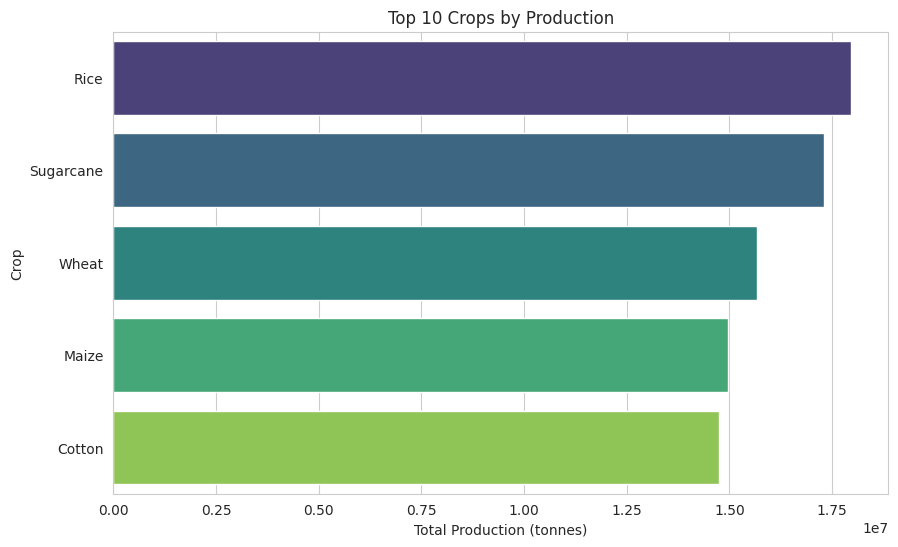

In [ ]:
top_crops = df.groupby('Crop')['Production (tonnes)'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")
plt.title("Top 10 Crops by Production")
plt.xlabel("Total Production (tonnes)")
plt.ylabel("Crop")
plt.show()


***Top 10 States by Production***

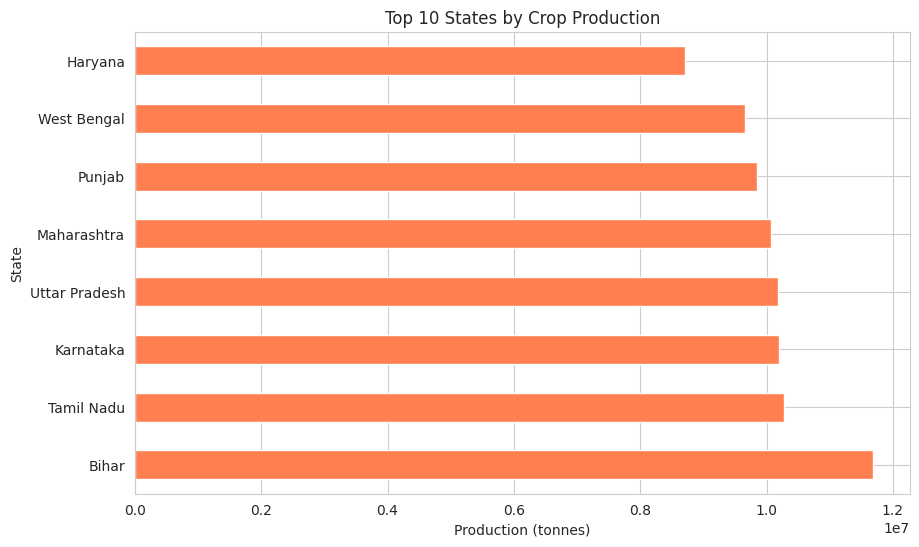

In [ ]:
top_states = df.groupby('State')['Production (tonnes)'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='barh', color='coral')
plt.title("Top 10 States by Crop Production")
plt.xlabel("Production (tonnes)")
plt.ylabel("State")
plt.show()


***Correlation Heatmap(if numberical columns exist)***

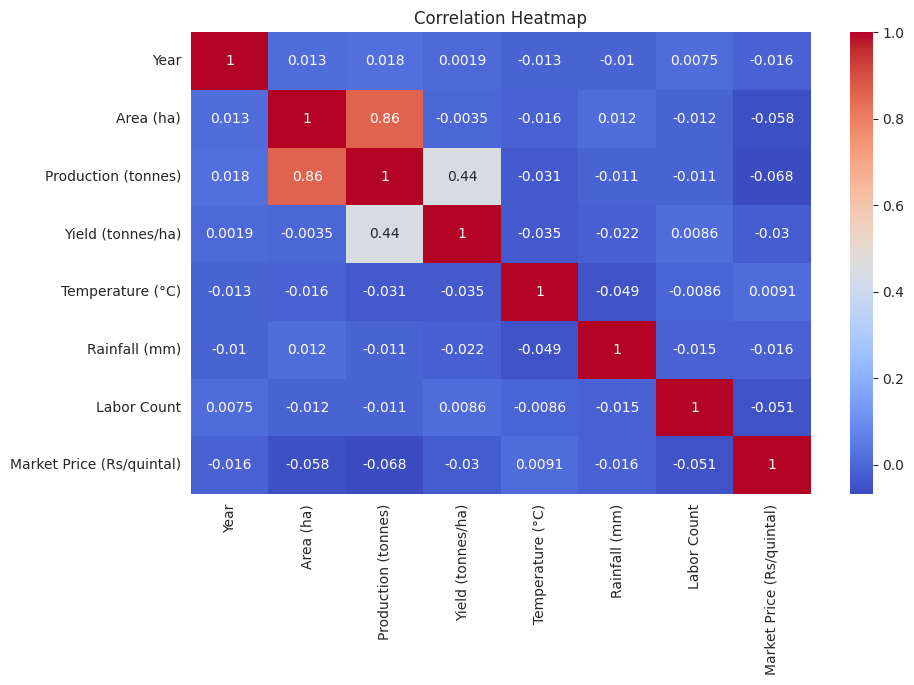

In [ ]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Rainfall vs Yield**

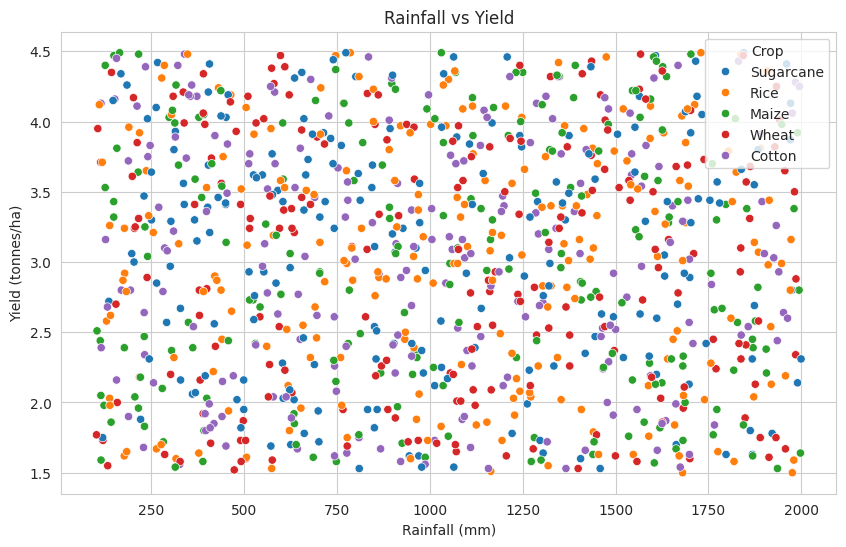

In [ ]:
if 'Rainfall (mm)' in df.columns and 'Yield (tonnes/ha)' in df.columns:
    sns.scatterplot(data=df, x='Rainfall (mm)', y='Yield (tonnes/ha)', hue='Crop')
    plt.title("Rainfall vs Yield")
    plt.show()


## 📌**Observation**
- Wheat and Rice are top crops.
- Punjab,UP, and Haryana are high-yielding states.
- Higher rainfall improves yield.

## ✅**Conclusion:**
This project analyzed crop production across Indian states. We used Python libraries like pandas, matplotlib, and seaborn to uncover patterns in crop yield and productivity. The results can help agricultural decision-makers.


## 🌱 Future Scope:
- Use ML to forecast yields.
- Include climate & soil data.
- Build dashboards for farmers.

In [ ]:
# 💾 Save cleaned dataset to CSV
df.to_csv("Cleaned_Crop_Production.csv", index=False)

# Download it
from google.colab import files
files.download("Cleaned_Crop_Production.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>